# <font color=blue>                          Real Estate House Price Prediction</font> 

## Descreption: 
### A real estate agency wanted to reduce the negotiation time and improve closure for buyers and sellers of homes by ensuring that both sides were advised well on the potential sale/purchase price of the home. To that end the agency wanted to predict a transaction price for all the houses in its market which would be as close as possible to a price where the transaction would take place. Data regarding all possible variables and qualities of over 10,000 houses sold in the past was collected and analyzed.

### Summary:

In data provided, Price is the dependant (target) variable. <br>

Independant ariables are, Suburb, Address, Rooms, Type(Type of house), Method (Method of sell), SellerG (Seller Name), Distance (Distance of Council Area from city center), Postcode (Postal code), Bedroom2 (Number of Bed room), Bathroom (Number of Bathroom), Car (Number of Car parking), Landsize (Landsize of house), BuildingArea(Bulding Area of house), YearBuilt, CouuncilArea. <br>

We can brodly devide Independant variable in three groups.<br>
**Location** : Suburb, Adress, Postcode, Distance, CouncilArea<br>
**House Attributes** : Rooms, Type, Bedroom2, Bathroom, Car, Landsize, BuildingArea, YearBuilt<br>
**Sell Attribute** : Method, SellerG <br>


### **Solutioning : **

It's a linear regresion proble. I have used 'glmnet' package for Lasso, Ridge and Elastic net.

I have used some cetegorical variable as is, like Suburb and Postcode, although I could have created groups within each of these variable and could have reduced the classes in ceach variable. But for this project I have choose to keep it as is, (the behind this is, I have used sparse matrix, which is compatable with glmnet package, and sparse matrix reduces the size of data set by eleminating zeroes. My data set size gotredused to 10% using sparse matrix.)

### Resultes :
I have got Root mean squre error of *333,903.12*


In [151]:
library(ggplot2)
library(dplyr)
library(tidyr)
library(dumm)
library(glmnet)
library(Matrix)

In [91]:
setwd("H:\\softwares\\Data Analytics_Darshan\\2. R.Introduction\\Project\\Project 1 Real Estate\\P1_Real Estate")

In [126]:
house_train=read.csv("housing_train.csv",stringsAsFactors = F,na.strings = c("","NA","unknown"))
house_test=read.csv("housing_test.csv",stringsAsFactors = F,na.strings = c("","NA","unknown"))

In [127]:
str(house_train)

'data.frame':	7536 obs. of  16 variables:
 $ Suburb      : chr  "Brunswick" "Reservoir" "Newport" "Brighton East" ...
 $ Address     : chr  "52 Evans St" "85 Radford Rd" "99 Anderson St" "4/377 South Rd" ...
 $ Rooms       : int  3 5 3 2 5 3 3 3 4 2 ...
 $ Type        : chr  "h" "h" "h" "u" ...
 $ Price       : int  1650000 791000 785000 755000 2500000 3020000 780000 2200000 760000 750000 ...
 $ Method      : chr  "S" "S" "S" "SP" ...
 $ SellerG     : chr  "Nelson" "Ray" "RT" "Buxton" ...
 $ Distance    : num  5.2 11.2 8.4 10.7 7.5 7.5 13.9 11.2 12.8 11.8 ...
 $ Postcode    : int  3056 3073 3015 3187 3123 3123 3165 3127 3033 3127 ...
 $ Bedroom2    : int  3 4 3 NA 5 3 3 3 NA 2 ...
 $ Bathroom    : int  1 3 1 NA 3 2 1 2 NA 2 ...
 $ Car         : int  2 1 1 NA 3 2 1 4 NA 2 ...
 $ Landsize    : int  495 961 185 NA 757 832 710 816 NA 0 ...
 $ BuildingArea: int  141 NA NA NA 240 NA NA NA NA 80 ...
 $ YearBuilt   : int  1920 NA NA NA 1925 NA 1966 NA NA 2003 ...
 $ CouncilArea : chr  "Morelan

In [128]:
str(house_test)

'data.frame':	1885 obs. of  15 variables:
 $ Suburb      : chr  "Abbotsford" "Abbotsford" "Abbotsford" "Abbotsford" ...
 $ Address     : chr  "6/241 Nicholson St" "403/609 Victoria St" "106/119 Turner St" "22 Park St" ...
 $ Rooms       : int  1 2 1 4 3 3 3 1 1 2 ...
 $ Type        : chr  "u" "u" "u" "h" ...
 $ Method      : chr  "S" "S" "SP" "S" ...
 $ SellerG     : chr  "Biggin" "Dingle" "Purplebricks" "Biggin" ...
 $ Distance    : num  2.5 2.5 2.5 2.5 2.5 2.5 2.5 2.5 2.5 2.5 ...
 $ Postcode    : int  3067 3067 3067 3067 3067 3067 3067 3067 3067 3067 ...
 $ Bedroom2    : int  1 NA NA NA 2 3 3 NA 1 2 ...
 $ Bathroom    : int  1 NA NA NA 1 2 2 NA 1 2 ...
 $ Car         : int  1 NA NA NA 1 2 2 NA 1 2 ...
 $ Landsize    : int  0 NA NA NA 138 0 4290 NA 0 98 ...
 $ BuildingArea: int  NA NA NA NA 105 NA 27 NA NA 128 ...
 $ YearBuilt   : int  NA NA NA NA 1890 2010 NA NA NA 1920 ...
 $ CouncilArea : chr  "Yarra" NA NA NA ...


### ==========================================================================================

##  <font color=green>Data Preparation</font>  

### Let's combine train and test data

In [129]:
house_train$Price1=house_train$Price
house_train$Price=NULL
names(house_train)[16]="Price"
house_train$is_train=1

house_test$Price=0
house_test$is_train=0


house=rbind(house_train,house_test)
str(house)

'data.frame':	9421 obs. of  17 variables:
 $ Suburb      : chr  "Brunswick" "Reservoir" "Newport" "Brighton East" ...
 $ Address     : chr  "52 Evans St" "85 Radford Rd" "99 Anderson St" "4/377 South Rd" ...
 $ Rooms       : int  3 5 3 2 5 3 3 3 4 2 ...
 $ Type        : chr  "h" "h" "h" "u" ...
 $ Method      : chr  "S" "S" "S" "SP" ...
 $ SellerG     : chr  "Nelson" "Ray" "RT" "Buxton" ...
 $ Distance    : num  5.2 11.2 8.4 10.7 7.5 7.5 13.9 11.2 12.8 11.8 ...
 $ Postcode    : int  3056 3073 3015 3187 3123 3123 3165 3127 3033 3127 ...
 $ Bedroom2    : int  3 4 3 NA 5 3 3 3 NA 2 ...
 $ Bathroom    : int  1 3 1 NA 3 2 1 2 NA 2 ...
 $ Car         : int  2 1 1 NA 3 2 1 4 NA 2 ...
 $ Landsize    : int  495 961 185 NA 757 832 710 816 NA 0 ...
 $ BuildingArea: int  141 NA NA NA 240 NA NA NA NA 80 ...
 $ YearBuilt   : int  1920 NA NA NA 1925 NA 1966 NA NA 2003 ...
 $ CouncilArea : chr  "Moreland" "Darebin" "Hobsons Bay" NA ...
 $ Price       : num  1650000 791000 785000 755000 2500000 3020000

In [130]:
a=sapply (house$Address, function(x) tail(strsplit(x,split=" ")[[1]],1))
class(a)
head(a,10)

[1] "character"

52 Evans St        85 Radford Rd       99 Anderson St 
                "St"                 "Rd"                 "St" 
      4/377 South Rd          3 Jaques St          75 Leura Gr 
                "Rd"                 "St"                 "Gr" 
         4 Adrian St        47 Suffolk Rd       37a Heather Av 
                "St"                 "Rd"                 "Av" 
50/781 Whitehorse Rd 
                "Rd"

### ==========================================================================================

###   Working with Adress Variable

In [131]:
a=as.matrix(a)
table(a)
length(house$road %in% names(sort(table(a),decreasing = T))[1:8])

house$road=(a)
house$road=as.character(house$road)

house$road[! house$road %in% names(sort(table(a),decreasing = T))[1:8]]="others"
table(house$road)

a
    Athol        Av    Avenue       Bnd Boulevard       Bvd       Cct       Cir 
        1       814        26         1         9        23         9         6 
       Cl      Cove        Cr  Crescent    Crofts  Crossway        Ct        Dr 
       24         1       234         3         1         1       224       142 
        E      East       Esp Esplanade   Fairway      Gdns     Glade       Gln 
        2         2         2         3         3         1         1         1 
       Gr    Grange     Grove       Gwy   Highway       Hwy        La  Lairidge 
      189         1         3         1         1        11        45         1 
     Mews        Mw         N      Nook       Nth    Parade       Pde        Pl 
        1         9         8         1         1         9       131        87 
       Qd        Qy        Rd       Res        Ri     Righi        Rt         S 
        4         1      1894         1         4         3         1         4 
       Sq        St    Str

[1] 0


    Av     Cr     Ct     Dr     Gr others    Pde     Rd     St 
   814    234    224    142    189    406    131   1894   5387 

In [132]:

house$shouse= grepl("/", house$Address)
house$shouse=ifelse(house$shouse=="TRUE",1,0)


table(house$shouse)
house$Address=NULL


   0    1 
6131 3290 

### NA Removal

In [133]:
table(house$Bedroom2)
house[is.na(house$Bedroom2),c("Bedroom2")]=3


table(house$Bathroom)
house[is.na(house$Bathroom),c("Bathroom")]=1


table(house$Car)
house[is.na(house$Car),c("Car")]=1


   0    1    2    3    4    5    6    7    8    9   20 
  10  449 2422 3069 1206  253   23    5    2    3    1 


   0    1    2    3    4    5    6    7    8 
  26 4337 2513  488   57   15    4    2    1 


   0    1    2    3    4    5    6    7    8 
 577 3443 2764  354  248   25   22    5    5 

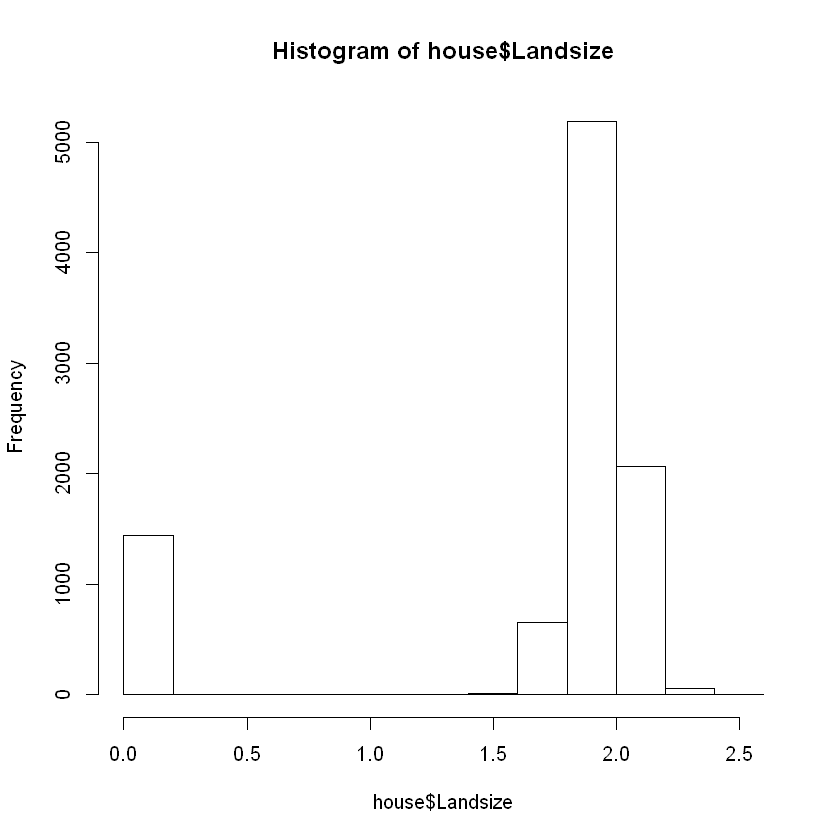

In [135]:
house$Landsize[is.na(house$Landsize)]=median(house$Landsize,na.rm = T)
house$Landsize=log(house$Landsize+1)
hist(house$Landsize)

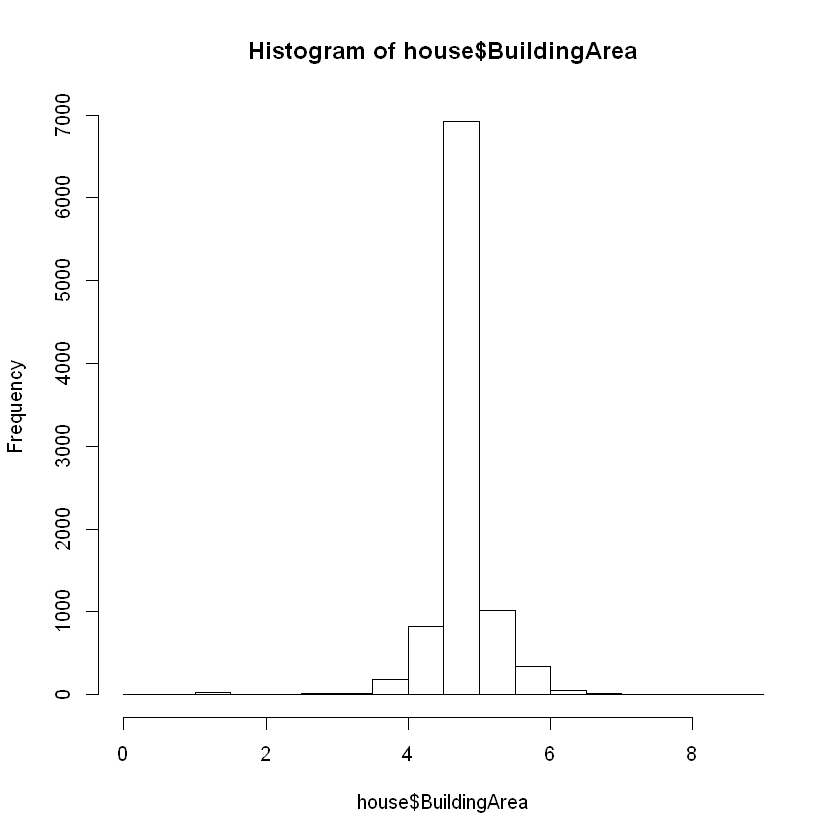

In [136]:
house$BuildingArea[is.na(house$BuildingArea)]=median(house$BuildingArea,na.rm = T)
house$BuildingArea=log(house$BuildingArea+1)
hist(house$BuildingArea)

In [137]:
sort(table(house$YearBuilt),decreasing = T)
house[is.na(house$YearBuilt),"YearBuilt"]=1970


1970 1960 1950 1900 1930 1920 2000 1910 1890 1940 1980 2012 1975 2010 1965 2005 
 515  402  365  240  193  187  177  169  162  150  128  107  102   98   96   92 
2013 1990 1995 1925 2009 2011 1955 2007 2014 2006 2008 1880 2002 2004 1935 1915 
  88   78   63   60   60   59   57   57   54   51   49   46   45   44   42   39 
1998 2003 1997 2001 2016 2015 1985 1999 1945 1968 1996 1905 1994 1993 1966 1992 
  38   35   34   34   33   32   31   27   18   18   17   15   15   14   12   12 
1938 1978 1948 1972 1928 1969 1974 1958 1967 1973 1977 1988 1976 1986 1991 2017 
  11   11   10   10    9    9    9    8    8    8    8    7    6    6    6    6 
1885 1888 1912 1926 1927 1934 1963 1971 1850 1923 1939 1941 1943 1947 1953 1957 
   5    5    5    5    5    5    5    5    4    4    4    4    4    4    4    4 
1979 1983 1987 1924 1946 1949 1951 1961 1982 1989 1863 1886 1887 1895 1902 1903 
   4    4    4    3    3    3    3    3    3    3    2    2    2    2    2    2 
1904 1906 1908 1913 1917 19

In [138]:
sort(table(house$CouncilArea),decreasing = T)
house$CouncilArea[is.na(house$CouncilArea)]="Boroondara"


   Boroondara      Moreland Moonee Valley       Darebin     Glen Eira 
          803           765           678           648           608 
  Stonnington   Maribyrnong         Yarra  Port Phillip       Banyule 
          511           478           455           441           359 
    Melbourne       Bayside   Hobsons Bay      Brimbank    Manningham 
          324           311           286           238           181 
   Whitehorse        Monash      Kingston          Hume 
          139           132            65            14 

In [139]:
house$Suburb=gsub("[[:punct:]]","",house$Suburb)
house$Suburb=gsub("[^[:alnum:]]","",house$Suburb)

house$CouncilArea=gsub("[[:punct:]]","",house$CouncilArea)
house$CouncilArea=gsub("[^[:alnum:]]","",house$CouncilArea)

house$SellerG=gsub("[[:punct:]]","",house$SellerG)
house$SellerG=gsub("[^[:alnum:]]","",house$SellerG)

In [144]:
b=house
b$CouncilArea=NULL
b$SellerG=NULL
b=b %>% mutate(quality = BuildingArea/Rooms) 
b=dummy(b,c("YearBuilt","Suburb","Rooms","Type","Method","Postcode","Bedroom2","Bathroom","Car","road"),limit = 500,rm_original = T)
dim(b)

[1] 9421  425

### Let's seperate train and test data

In [145]:
house_train=b[b$is_train==1,]
house_train$is_train=NULL

house_test=b[b$is_train==0,]
house_test$is_train=NULL

### Modeling

In [148]:
b_train=house_train
dim(b_train)

[1] 7536  424

In [149]:
b_train$Distance1=b_train$Distance^2
b_train$Distance2=b_train$Distance^3
b_train$Distance3=b_train$Distance^4
b_train$Distance4=b_train$Distance^5
b_train$Distance5=b_train$Distance^6


b_train$Landsize1=b_train$Landsize^2
b_train$Landsize2=b_train$Landsize^3
b_train$Landsize3=b_train$Landsize^4
b_train$Landsize4=b_train$Landsize^5
b_train$Landsize5=b_train$Landsize^6

b_train$BuildingArea1=b_train$BuildingArea^2
b_train$BuildingArea2=b_train$BuildingArea^3
b_train$BuildingArea3=b_train$BuildingArea^4
b_train$BuildingArea4=b_train$BuildingArea^5
b_train$BuildingArea5=b_train$BuildingArea^6

In [152]:
x.b_train=as.matrix(b_train[-4])
y.b_train=as.matrix(b_train[4])


dim(as.data.frame(x.b_train))

[1] 7536  438

In [153]:
x.b_train=Matrix(x.b_train,sparse = T)

y.b_train=log(y.b_train+1)

In [154]:
for (i in 0:10) {
  assign(paste("fit", i, sep=""), cv.glmnet(x.b_train, y.b_train, type.measure="mse", 
                                            alpha=i/10,family="gaussian"))
}

In [155]:
yhat0 <- predict(fit0, s=fit0$lambda.1se, newx=x.b_train)
yhat1 <- predict(fit1, s=fit1$lambda.1se, newx=x.b_train)
yhat2 <- predict(fit2, s=fit2$lambda.1se, newx=x.b_train)
yhat3 <- predict(fit3, s=fit3$lambda.1se, newx=x.b_train)
yhat4 <- predict(fit4, s=fit4$lambda.1se, newx=x.b_train)
yhat5 <- predict(fit5, s=fit5$lambda.1se, newx=x.b_train)
yhat6 <- predict(fit6, s=fit6$lambda.1se, newx=x.b_train)
yhat7 <- predict(fit7, s=fit7$lambda.1se, newx=x.b_train)
yhat8 <- predict(fit8, s=fit8$lambda.1se, newx=x.b_train)
yhat9 <- predict(fit9, s=fit9$lambda.1se, newx=x.b_train)
yhat10 <- predict(fit10, s=fit10$lambda.1se, newx=x.b_train)

mse0 <- sqrt(mean((y.b_train - yhat0)^2))
mse1 <- sqrt(mean((y.b_train - yhat1)^2))
mse2 <- sqrt(mean((y.b_train - yhat2)^2))
mse3 <- sqrt(mean((y.b_train - yhat3)^2))
mse4 <- sqrt(mean((y.b_train - yhat4)^2))
mse5 <- sqrt(mean((y.b_train - yhat5)^2))
mse6 <- sqrt(mean((y.b_train - yhat6)^2))
mse7 <- sqrt(mean((y.b_train - yhat7)^2))
mse8 <- sqrt(mean((y.b_train - yhat8)^2))
mse9 <- sqrt(mean((y.b_train - yhat9)^2))
mse10 <- sqrt(mean((y.b_train - yhat10)^2))

In [156]:
mse=c(mse0,mse1,mse2,mse3,mse4,mse5,mse6,mse7,mse8,mse9,mse10)
mse

[1] 0.2256627 0.2274101 0.2275492 0.2273103 0.2281794 0.2280980 0.2280736
 [8] 0.2263297 0.2280175 0.2270791 0.2262841

[1] 333903.1

`geom_smooth()` using method = 'gam'


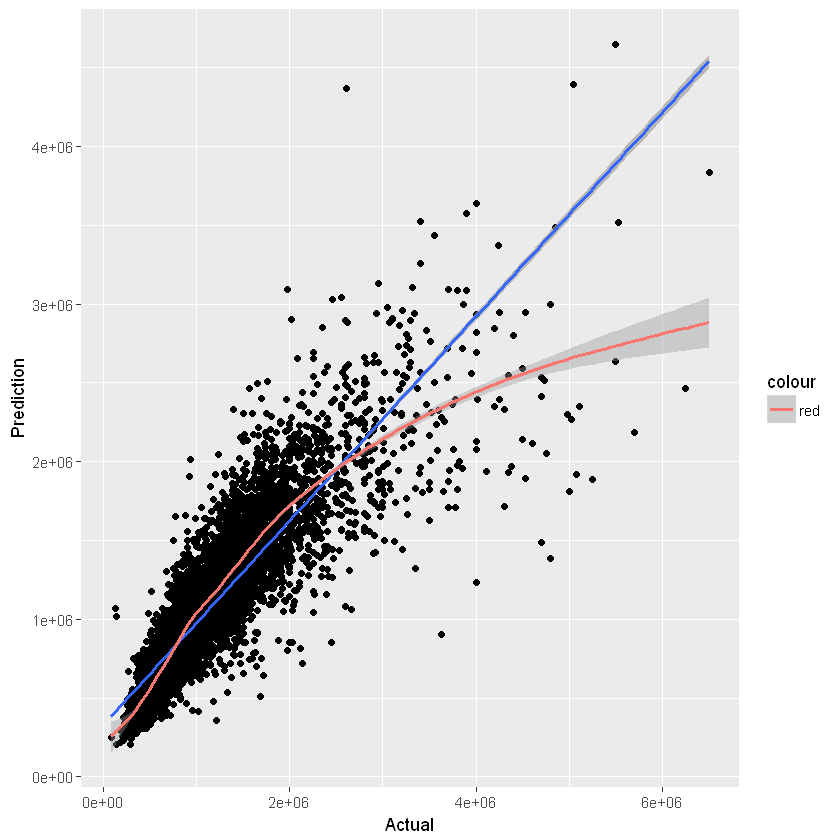

In [174]:
sqrt(mean((exp(c(yhat0)) - exp(c(y.b_train)))^2))

df=data.frame(Prediction=exp(c(yhat0)), Actual=exp(c(y.b_train)))
ggplot(df,aes(Actual,Prediction))+geom_point()+geom_smooth(method = "lm")+geom_smooth(method = "lm")+
geom_smooth(aes(color="red"))
